In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,classification_report
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [318]:

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

IndexError: list index out of range

In [24]:


X_train = pd.read_csv('X_train.csv')

X_test = pd.read_csv('X_test.csv')

y_train = pd.read_csv('y_train.csv')

y_test = pd.read_csv('y_test.csv')


In [25]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train: (52560, 527)
Shape of y_train: (52560, 2)


In [26]:
y_train = y_train['target']
y_test = y_test['target']

In [27]:
X_train["state"].values.reshape(-1,1)

array([['new mexico'],
       ['new mexico'],
       ['new mexico'],
       ...,
       ['wyoming'],
       ['wyoming'],
       ['wyoming']], dtype=object)

In [28]:

encoder = OneHotEncoder()

encoder.fit(X_train['state'].values.reshape(-1, 1))

X_train_encoded = encoder.transform(X_train['state'].values.reshape(-1, 1))
X_test_encoded = encoder.transform(X_test['state'].values.reshape(-1, 1))

X_train_encoded = X_train_encoded.toarray()
X_test_encoded = X_test_encoded.toarray()

print(encoder.categories_[0])

['alabama' 'alaska' 'arizona' 'arkansas' 'california' 'colorado'
 'connecticut' 'delaware' 'district of columbia' 'florida' 'georgia'
 'hawaii' 'idaho' 'illinois' 'indiana' 'iowa' 'kansas' 'louisiana' 'maine'
 'maryland' 'massachusetts' 'michigan' 'minnesota' 'mississippi'
 'missouri' 'nebraska' 'nevada' 'new hampshire' 'new jersey' 'new mexico'
 'new york' 'north carolina' 'north dakota' 'ohio' 'oklahoma' 'oregon'
 'pennsylvania' 'rhode island' 'south carolina' 'tennessee' 'texas' 'utah'
 'vermont' 'virginia' 'washington' 'west virginia' 'wisconsin' 'wyoming']


In [29]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.categories_[0])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.categories_[0])

In [30]:
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)
X_train.drop('state', axis=1, inplace=True)
X_test.drop('state', axis=1, inplace=True)

In [31]:
X_train

,weeks,flu,swine,stomach,symptoms,virus,bug,strep,season,influenza,...,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1090,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52556,1091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52557,1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52558,1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [33]:
concatenated_df = pd.concat([X_train, X_test])

# Check for missing values in each column
missing_values = concatenated_df.isna().sum()

# Iterate over the missing_values Series
for column_name, num_missing in missing_values.items():
    if num_missing > 0:
        print(f"Column '{column_name}' has {num_missing} missing values.")
    else :
        print("-")

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-


In [34]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [35]:
X_train

,weeks,flu,swine,stomach,symptoms,virus,bug,strep,season,influenza,...,south carolina,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1090,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52556,1091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52557,1092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
52558,1093,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
X = pd.concat([X_train, X_test], axis=0)
y = pd.concat([y_train, y_test], axis=0)

In [37]:
X.iloc[1000, : ]

y_train

0        0
1        0
2        0
3        0
4        0
        ..
52555    0
52556    0
52557    0
52558    0
52559    0
Name: target, Length: 52560, dtype: int64

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


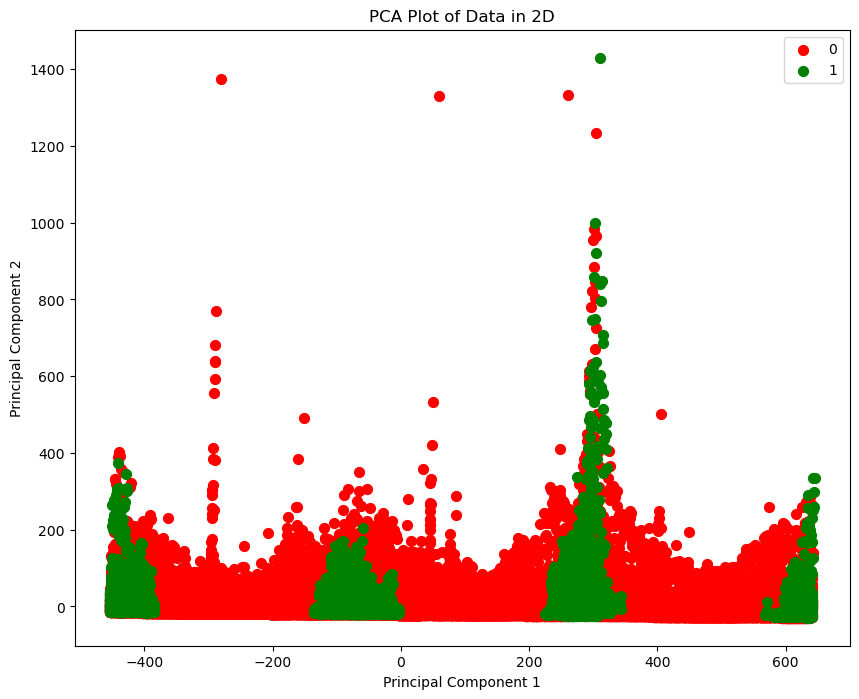

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Concatenate X_train and X_test along axis 0
X = pd.concat([X_train, X_test], axis=0)

# Concatenate y_train and y_test along axis 0
y = pd.concat([y_train, y_test], axis=0)

# Apply PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = y.values

# Plot the data in 2D
plt.figure(figsize=(10, 8))
targets = df_pca['Target'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'gray'][:len(targets)]
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    plt.scatter(df_pca.loc[indices_to_keep, 'PC1'], df_pca.loc[indices_to_keep, 'PC2'], c=color, s=50, label=target)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Data in 2D')
plt.legend()
plt.show()


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


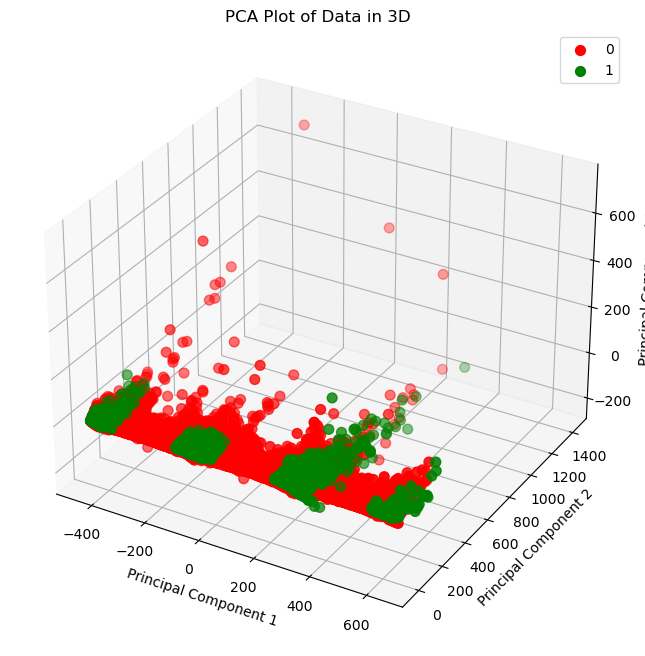

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library
from sklearn.decomposition import PCA

# Concatenate X_train and X_test along axis 0
X = pd.concat([X_train, X_test], axis=0)

# Concatenate y_train and y_test along axis 0
y = pd.concat([y_train, y_test], axis=0)

# Apply PCA to reduce dimensionality to 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Target'] = y.values

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

targets = df_pca['Target'].unique()
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange', 'purple', 'gray'][:len(targets)]
for target, color in zip(targets, colors):
    indices_to_keep = df_pca['Target'] == target
    ax.scatter(df_pca.loc[indices_to_keep, 'PC1'], 
               df_pca.loc[indices_to_keep, 'PC2'], 
               df_pca.loc[indices_to_keep, 'PC3'], 
               c=color, 
               s=50, 
               label=target)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Plot of Data in 3D')
ax.legend()
plt.show()


<h1> Random Forest Classifier  </h1>

In [40]:


rf = RandomForestClassifier()

rf.fit(X_train, y_train)

train_predictions_rf = rf.predict(X_train)
test_predictions_rf = rf.predict(X_test)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and

Random Forest Model:
Train Accuracy: 0.9999809741248098
Test Accuracy: 0.9011168384879725
Confusion Matrix:
 [[20952    46]
 [ 2256    26]]
Precision: 0.8496943696193555
Recall: 0.9011168384879725
F1 Score: 0.8571714649725546
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95     20998
           1       0.36      0.01      0.02      2282

    accuracy                           0.90     23280
   macro avg       0.63      0.50      0.49     23280
weighted avg       0.85      0.90      0.86     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [41]:
nb = GaussianNB()

nb.fit(X_train, y_train)

train_predictions_nb = nb.predict(X_train)
test_predictions_nb = nb.predict(X_test)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and


Naive Bayes Model:
Train Accuracy: 0.8760083713850837
Test Accuracy: 0.8580756013745704
Confusion Matrix:
 [[19360  1638]
 [ 1666   616]]
Precision: 0.8572968539701452
Recall: 0.8580756013745704
F1 Score: 0.8576848442223032
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     20998
           1       0.27      0.27      0.27      2282

    accuracy                           0.86     23280
   macro avg       0.60      0.60      0.60     23280
weighted avg       0.86      0.86      0.86     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


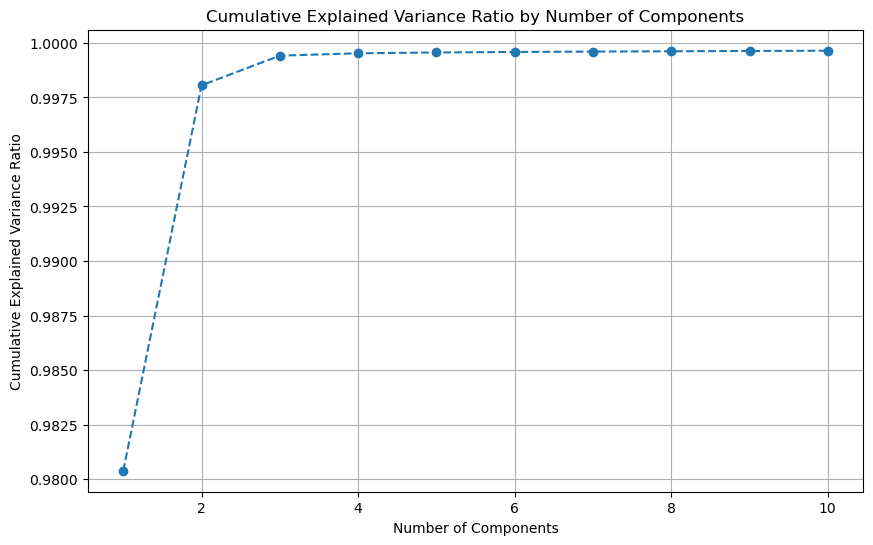

In [42]:


pca = PCA(n_components=10)

pca.fit(X_train)

cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()


In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and

In [44]:

rf = RandomForestClassifier()

rf.fit(X_train_pca, y_train)

train_predictions_rf = rf.predict(X_train_pca)
test_predictions_rf = rf.predict(X_test_pca)

train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf = accuracy_score(y_test, test_predictions_rf)

confusion_matrix_rf = confusion_matrix(y_test, test_predictions_rf)

precision_rf = precision_score(y_test, test_predictions_rf, average='weighted')
recall_rf = recall_score(y_test, test_predictions_rf, average='weighted')
f1_rf = f1_score(y_test, test_predictions_rf, average='weighted')

classification_report_rf = classification_report(y_test, test_predictions_rf)


print("Random Forest Model:")
print("Train Accuracy:", train_accuracy_rf)
print("Test Accuracy:", test_accuracy_rf)
print("Confusion Matrix:\n", confusion_matrix_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", classification_report_rf)


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


Random Forest Model:
Train Accuracy: 1.0
Test Accuracy: 0.8875859106529209
Confusion Matrix:
 [[20611   387]
 [ 2230    52]]
Precision: 0.8255257734368017
Recall: 0.8875859106529209
F1 Score: 0.8518784564688273
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     20998
           1       0.12      0.02      0.04      2282

    accuracy                           0.89     23280
   macro avg       0.51      0.50      0.49     23280
weighted avg       0.83      0.89      0.85     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

<h1> Gaussian NB  </h1>

In [45]:
nb = GaussianNB()

nb.fit(X_train_pca, y_train)

train_predictions_nb = nb.predict(X_train_pca)
test_predictions_nb = nb.predict(X_test_pca)

train_accuracy_nb = accuracy_score(y_train, train_predictions_nb)
test_accuracy_nb = accuracy_score(y_test, test_predictions_nb)

confusion_matrix_nb = confusion_matrix(y_test, test_predictions_nb)

precision_nb = precision_score(y_test, test_predictions_nb, average='weighted')
recall_nb = recall_score(y_test, test_predictions_nb, average='weighted')
f1_nb = f1_score(y_test, test_predictions_nb, average='weighted')

classification_report_nb = classification_report(y_test, test_predictions_nb)


print("\nNaive Bayes Model:")
print("Train Accuracy:", train_accuracy_nb)
print("Test Accuracy:", test_accuracy_nb)
print("Confusion Matrix:\n", confusion_matrix_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)
print("Classification Report:\n", classification_report_nb)



Naive Bayes Model:
Train Accuracy: 0.9288051750380517
Test Accuracy: 0.894458762886598
Confusion Matrix:
 [[20712   286]
 [ 2171   111]]
Precision: 0.8438091773526106
Recall: 0.894458762886598
F1 Score: 0.8595951325989923
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.94     20998
           1       0.28      0.05      0.08      2282

    accuracy                           0.89     23280
   macro avg       0.59      0.52      0.51     23280
weighted avg       0.84      0.89      0.86     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

<nb>
<h1 style="color:green">  

 Artifical neural networks 
 
 
 
 
 </h1>

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,564,565,566,567,568,569,570,571,572,573
0,-1.730470,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
1,-1.727306,0.338760,0.060041,-0.040054,-0.096427,-0.134679,-0.163507,-0.185185,-0.202898,-0.218368,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
2,-1.724143,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
3,-1.720979,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
4,-1.717815,-0.394992,-0.213043,-0.271654,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,1.717815,-0.394992,-0.486127,-0.503254,-0.303631,-0.325743,-0.341771,-0.354802,-0.364652,-0.373260,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655
52556,1.720979,-0.394992,-0.486127,-0.503254,-0.510835,-0.516807,-0.520035,-0.524420,-0.526406,-0.528151,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655
52557,1.724143,-0.394992,-0.486127,-0.503254,-0.510835,-0.516807,-0.520035,-0.524420,-0.526406,-0.528151,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655
52558,1.727306,-0.394992,-0.486127,-0.503254,-0.510835,-0.516807,-0.520035,-0.524420,-0.526406,-0.528151,...,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,-0.145865,6.855655


In [48]:
best_params = {'batch_size': 10, 'epochs': 5, "layer1": 10, "layer2": 10}
best_accuracy  = 0
epochs = [5,10,15]
batch_size = [10,20,30,40]
layers1 = [10,20,30,40]
layers2 = [10,20,30,40]

for epoch in epochs:
    for batch in batch_size:
        for layer1 in layers1:
            for layer2 in layers2:  
                model = Sequential()
                model.add(Dense(layer1, input_dim=X_train_pca.shape[1], activation='relu'))
                model.add(Dense(layer2, activation='relu'))
                model.add(Dense(1, activation='sigmoid'))
                model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
                model.fit(X_train, y_train, epochs=epoch, batch_size=batch, verbose=1)
                test_accuracy = model.evaluate(X_test_pca, y_test)[1]
                if test_accuracy > best_accuracy:
                    best_accuracy = test_accuracy
                    best_params = {'batch_size': batch, 'epochs': epoch, "layer1": layer1,"layer2"  : layer2}
                    print("Best Parameters:", best_params)
                    print("Test Accuracy:", test_accuracy)
                print("Test Accuracy:", test_accuracy)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-22 01:47:52.194548: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 01:47:52.195050: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download an

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 3, but received input with shape (10, 574)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(10, 574), dtype=float32)
  • training=True
  • mask=None

In [52]:
best_params = {'batch_size': 10, 'epochs': 5, "layer1": 10, "layer2": 10}
print("Best Parameters:", best_params)
best_accuracy


Best Parameters: {'batch_size': 10, 'epochs': 5, 'layer1': 10, 'layer2': 10}


0

<h1>  Without PCA </h1>

In [ ]:
models_params_results = [ {"report" : [], "params" : {"layer1" : 16,"layer2" : 16,"batch_size" : 32 } }]

In [53]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [54]:
X_temp = X_res
y_temp = y_res


In [401]:
best_params = {'batch_size': 35, 'epochs': 10, "layer1": 16, "layer2": 16}
model = Sequential()
model.add(Dense(best_params['layer1'], input_dim=X_res.shape[1], activation='relu'))
model.add(Dense(best_params['layer2'], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_res, y_res, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)



Epoch 1/10


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 590us/step - accuracy: 0.8205 - loss: 0.3869
Epoch 2/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 552us/step - accuracy: 0.9440 - loss: 0.1543
Epoch 3/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 573us/step - accuracy: 0.9621 - loss: 0.1077
Epoch 4/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 566us/step - accuracy: 0.9706 - loss: 0.0839
Epoch 5/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 570us/step - accuracy: 0.9751 - loss: 0.0708
Epoch 6/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 549us/step - accuracy: 0.9774 - loss: 0.0634
Epoch 7/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 561us/step - accuracy: 0.9804 - loss: 0.0549
Epoch 8/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 662us/step - accuracy: 0.9810 - loss: 0.0499
Epoch 9/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 653us/step - accuracy: 0.9826 - loss: 0.0472
Epoch 10/10
2837/2837 ━━━━━━━━━━━━━━━━━━━━ 2s 570us/step - accuracy: 0.9843 - loss: 0.0426


In [402]:
predicted = model.predict(X_test) >= 0.5

rep = classification_report(y_test, predicted)

print(rep)

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     20998
           1       0.31      0.27      0.29      2282

    accuracy                           0.87     23280
   macro avg       0.62      0.60      0.61     23280
weighted avg       0.86      0.87      0.87     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [399]:
X_temp = X_train
y_temp = y_train

In [405]:
best_params = {'batch_size': 50, 'epochs': 50, "layer1": 16, "layer2": 16}
model = Sequential()
model.add(Dense(best_params['layer1'], input_dim=X_temp.shape[1], activation='relu'))
model.add(Dense(best_params['layer2'], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_temp, y_temp, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/50


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - accuracy: 0.9370 - loss: 0.2109
Epoch 2/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 559us/step - accuracy: 0.9544 - loss: 0.1235
Epoch 3/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 556us/step - accuracy: 0.9623 - loss: 0.1073
Epoch 4/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.9665 - loss: 0.0956
Epoch 5/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9692 - loss: 0.0869
Epoch 6/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 651us/step - accuracy: 0.9735 - loss: 0.0773
Epoch 7/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9769 - loss: 0.0708
Epoch 8/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 560us/step - accuracy: 0.9798 - loss: 0.0642
Epoch 9/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 528us/step - accuracy: 0.9801 - loss: 0.0616
Epoch 10/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 536us/step - accuracy: 0.9840 - loss: 0.0525
Epoch 11/50
1052/1052 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - accuracy: 0.9839 - loss: 0.0501
Epoch 12/50
1052/10

In [404]:
predicted = model.predict(X_test) >= 0.5 
rep = classification_report(y_test, predicted)

print(rep)

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     20998
           1       0.53      0.23      0.32      2282

    accuracy                           0.90     23280
   macro avg       0.72      0.60      0.63     23280
weighted avg       0.88      0.90      0.89     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

<h1>  WITH OverSampling </h1>

In [290]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [203]:
predicted = model.predict(X_test) > 0.5

728/728 ━━━━━━━━━━━━━━━━━━━━ 1s 687us/step


In [205]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     20998
           1       0.35      0.21      0.26      2282

    accuracy                           0.88     23280
   macro avg       0.63      0.58      0.60     23280
weighted avg       0.86      0.88      0.87     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

<h1>  Trying oversampling </h1>

In [147]:
from imblearn import over_sampling
import keras
#merge X_train_pca and y_train
X_train_pca_df = pd.DataFrame(X_train_pca)
y_train_df = pd.DataFrame(y_train)


In [148]:
oversampler = over_sampling.RandomOverSampler(sampling_strategy="minority")

In [149]:
X_over, y_over = oversampler.fit_resample(X_train_pca_df, y_train_df)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and

In [150]:
print(y_train.value_counts())
y_over.value_counts()

target
0    49655
1     2905
Name: count, dtype: int64


target
0         49655
1         49655
Name: count, dtype: int64

In [151]:
best_params = {'batch_size': 10, 'epochs': 10, "layer1": 30, "layer2": 30}
model = Sequential()
model.add(Dense(best_params['layer1'], input_dim=X_train_pca.shape[1], activation='relu'))
model.add(Dense(best_params['layer2'], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(X_over, y_over, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

Epoch 1/10


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 423us/step - accuracy: 0.6780 - loss: 1.0451
Epoch 2/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 440us/step - accuracy: 0.7157 - loss: 0.5806
Epoch 3/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 459us/step - accuracy: 0.7505 - loss: 0.5023
Epoch 4/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 468us/step - accuracy: 0.7739 - loss: 0.4657
Epoch 5/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 481us/step - accuracy: 0.7990 - loss: 0.4229
Epoch 6/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 455us/step - accuracy: 0.8341 - loss: 0.3747
Epoch 7/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 448us/step - accuracy: 0.8512 - loss: 0.3452
Epoch 8/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 455us/step - accuracy: 0.8639 - loss: 0.3234
Epoch 9/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 5s 457us/step - accuracy: 0.8655 - loss: 0.3185
Epoch 10/10
9931/9931 ━━━━━━━━━━━━━━━━━━━━ 4s 429us/step - accuracy: 0.8701 - loss: 0.3075


In [138]:
predicted = model.predict(X_test_pca) > 0.5
print(classification_report(predicted, y_test))

728/728 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step
              precision    recall  f1-score   support

       False       0.81      0.91      0.86     18727
        True       0.26      0.13      0.18      4553

    accuracy                           0.76     23280
   macro avg       0.54      0.52      0.52     23280
weighted avg       0.70      0.76      0.72     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [174]:
y_train.value_counts()

target
0    49655
1     2905
Name: count, dtype: int64

<h1 style="color:green">  Decision Tree Classifier </h1>

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(criterion="entropy",max_depth=5,random_state=46,splitter="best")
dt.fit(X_over, y_over)

test_predicted = dt.predict(X_over)



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and

In [171]:
y_test.value_counts()

target
0    20998
1     2282
Name: count, dtype: int64

In [173]:
print(classification_report(test_predicted, y_over))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     46710
           1       0.92      0.87      0.89     52600

    accuracy                           0.89     99310
   macro avg       0.89      0.89      0.89     99310
weighted avg       0.89      0.89      0.89     99310



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and

<h1> 


K Nearest Neighbour




 </h1>

In [119]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  


In [120]:
# Train the Model
knn_classifier.fit(X_train_pca, y_train)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier()

In [121]:
y_pred = knn_classifier.predict(X_test_pca)


In [122]:
y_pred = np.array(y_pred)

In [123]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
y_test

0        1
1        1
2        1
3        1
4        1
        ..
23275    0
23276    0
23277    0
23278    0
23279    0
Name: target, Length: 23280, dtype: int64

In [125]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8841924398625429


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [137]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print("classification report:", classification_report)

classification report:               precision    recall  f1-score   support

           0       0.90      0.97      0.93     20998
           1       0.04      0.01      0.02      2282

    accuracy                           0.88     23280
   macro avg       0.47      0.49      0.48     23280
weighted avg       0.82      0.88      0.84     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [139]:

# Train the Model
knn_classifier = KNeighborsClassifier(5)
knn_classifier.fit(X_train, y_train)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier()

In [140]:
y_pred = knn_classifier.predict(X_test)

In [141]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("classification report:", report)

classification report:               precision    recall  f1-score   support

           0       0.90      0.97      0.93     20998
           1       0.04      0.01      0.02      2282

    accuracy                           0.88     23280
   macro avg       0.47      0.49      0.48     23280
weighted avg       0.82      0.88      0.84     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [143]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_res, y_res = nm.fit_resample(X_train, y_train)


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [144]:
# Train the Model
knn_classifier.fit(X_res, y_res)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


KNeighborsClassifier()

In [145]:
y_pred = knn_classifier.predict(X_test)
y_pred 

array([0, 0, 1, ..., 0, 0, 0])

In [146]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.92      0.51      0.65     20998
           1       0.11      0.57      0.19      2282

    accuracy                           0.51     23280
   macro avg       0.51      0.54      0.42     23280
weighted avg       0.84      0.51      0.61     23280



/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [147]:
y_test_reshaped = np.hstack((np.arange(len(y_test)).reshape(-1,1), np.zeros((len(y_test), 1))))
y_test_reshaped

array([[0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00],
       [2.0000e+00, 0.0000e+00],
       ...,
       [2.3277e+04, 0.0000e+00],
       [2.3278e+04, 0.0000e+00],
       [2.3279e+04, 0.0000e+00]])

In [148]:
y_test_reshaped.shape

(23280, 2)

In [149]:
y_true = y_test
y_true.shape

(23280,)

In [150]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [151]:
y_train_reshaped = np.hstack((np.arange(len(y_train)).reshape(-1,1), np.zeros((len(y_train), 1))))
y_train_reshaped

array([[0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00],
       [2.0000e+00, 0.0000e+00],
       ...,
       [5.2557e+04, 0.0000e+00],
       [5.2558e+04, 0.0000e+00],
       [5.2559e+04, 0.0000e+00]])

In [152]:
# Initialize the SVM Classifier
svm_classifier = SVC()

In [153]:
y_train_target = y_train

In [154]:
# Train the Model
#svm_classifier.fit(X_train_pca, y_train_target)

In [155]:
# Instantiate the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_pca, y_train_target)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


SVC()

In [156]:
# Make Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)
#y_pred_svm = y_pred_svm[: ,1]
y_pred_svm

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
y_test_target = y_test
y_test_target

0        1
1        1
2        1
3        1
4        1
        ..
23275    0
23276    0
23277    0
23278    0
23279    0
Name: target, Length: 23280, dtype: int64

In [158]:
y_test_array = np.array(y_test_target)
y_test_array

array([1, 1, 1, ..., 0, 0, 0])

In [159]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9019759450171821


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

the svm accuracy for the train


In [160]:
# Make Predictions
y_pred_svm_train = svm_classifier.predict(X_train_pca)
y_pred_svm_train

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
y_train_target = y_train
y_train_target = np.array(y_train_target)
y_train_target

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
# Calculate accuracy
accuracy_svm_train = accuracy_score(y_train_target, y_pred_svm_train) 
print("SVM Accuracy:", accuracy_svm_train)

SVM Accuracy: 0.9453576864535769


In [165]:
# Calculate accuracy
from sklearn.metrics import classification_report
classification_report_svm_train = classification_report(y_train_target, y_pred_svm_train) 
print(classification_report_svm_train)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     49655
           1       0.68      0.02      0.04      2905

    accuracy                           0.95     52560
   macro avg       0.81      0.51      0.51     52560
weighted avg       0.93      0.95      0.92     52560



In [169]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_pca, y_train)

# Check class distribution after oversampling
print("Class distribution after oversampling:", Counter(y_train_oversampled))

Class distribution after oversampling: Counter({0: 49655, 1: 49655})


/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isin

In [170]:
# Instantiate the SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_oversampled, y_train_oversampled)

/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/abdenour/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [129]:
# Make Predictions
y_pred_svm = svm_classifier.predict(X_test_pca)
#y_pred_svm = y_pred_svm[: ,1]
y_pred_svm

array([1, 1, 1, ..., 0, 0, 0])

In [130]:
# Calculate accuracy
classification_report_svm_train = classification_report(y_test_target, y_pred_svm) 
print(classification_report_svm_train)

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     20998
           1       0.13      0.20      0.16      2282

    accuracy                           0.78     23280
   macro avg       0.52      0.53      0.52     23280
weighted avg       0.83      0.78      0.81     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo

In [2]:
# Train the Model
knn_classifier.fit(X_train_oversampled, y_train_oversampled)


NameError: name 'knn_classifier' is not defined

In [132]:
y_pred = knn_classifier.predict(X_test_pca)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
classification_report = classification_report(y_test2, y_pred)
print(classification_report) 

              precision    recall  f1-score   support

           0       0.91      0.89      0.90     20998
           1       0.16      0.19      0.18      2282

    accuracy                           0.82     23280
   macro avg       0.54      0.54      0.54     23280
weighted avg       0.84      0.82      0.83     23280



/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/hamoumohamednadir/anaconda3/envs/DM_ENV/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be remo